In [2]:
import yelp
import pandas as pd
import numpy as np
#from yelp.client import Client
from yelpapi import YelpAPI
import random

client_id = "eJ_rHARugbCfnB-cXGEucA"
api_key = "v5g6lWFzY6sXhlXrxbhbbxYb--0WOIFv44TycZLYkwmcsR2iTvhOqlJZmJEZKIsQddPWgQmvFBBCxEeEIpFXcipEHqG4IWeGx2iBCNrske6WWqhsoLis0h6-KQSGYXYx"

yelp_api = YelpAPI(api_key)

In [78]:
# Search Term: Search terms used in a standard Yelp search.
# Location: City, St or Zip Code
# Search Limit: How many results do you want (max 50)

term = 'delicious' #'mediterranean'
location = '100 E Pratt St'
search_limit = 50

response = yelp_api.search_query(term = term,
                                 location = location,
                                 limit = search_limit)

##### MAYBE create crawler to go through individual pages starting at below url

https://www.yelp.com/search?find_desc=&find_loc=100+E+Pratt+St%2C+Baltimore%2C+MD&attrs=GoodForMeal.lunch&start=0

###### can then add +10 to ending to go through additional pages as part of crawler

## Image Scrapping Starts Here

In [53]:
from bs4 import BeautifulSoup
import requests
from lxml import html  
import csv
import requests
from time import sleep
import re
import argparse
import sys
import time as t
import sys
from PIL import Image
from io import BytesIO

In [79]:
cols = list(response['businesses'][0].keys())
# rez = pd.DataFrame(columns=cols)
## Concatenate is much quicker than using append method
rez = pd.concat([pd.DataFrame(response['businesses'], columns=cols) for i in response['businesses']], 
                ignore_index=True, sort=False)

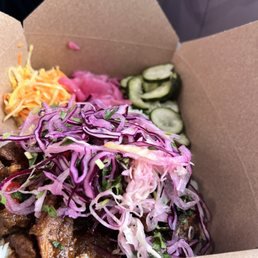

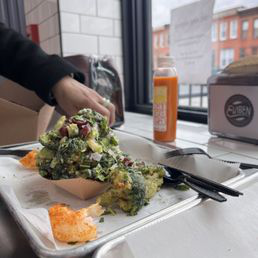

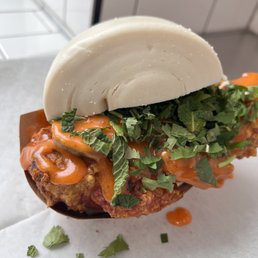

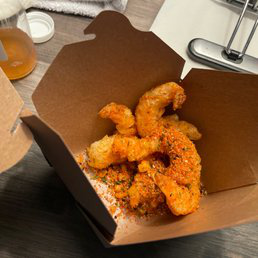

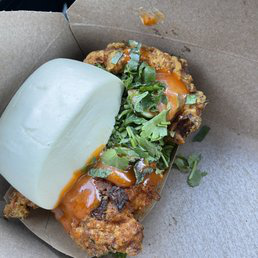

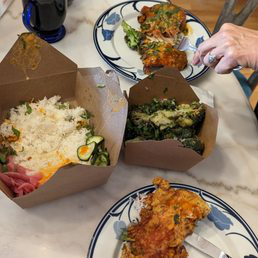

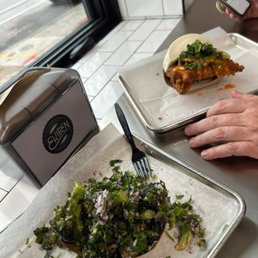

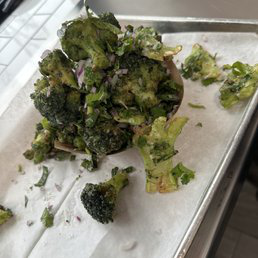

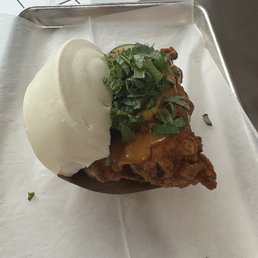

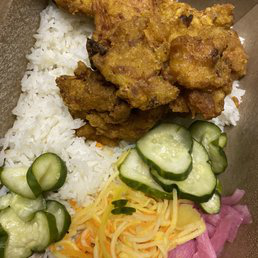

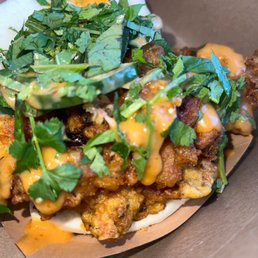

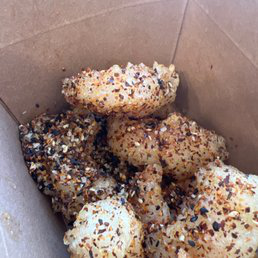

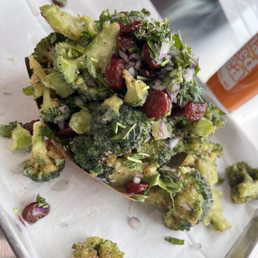

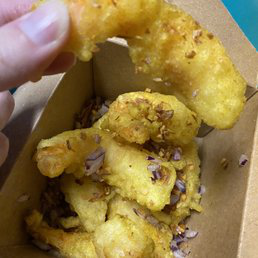

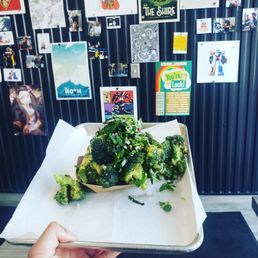

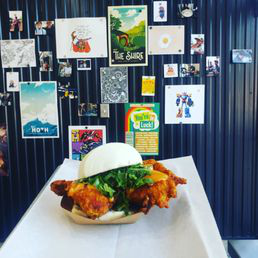

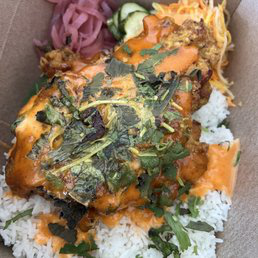

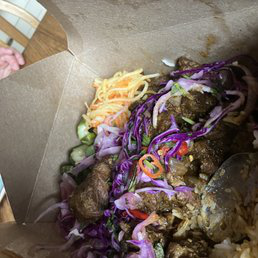

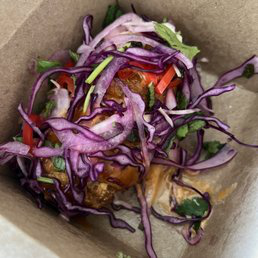

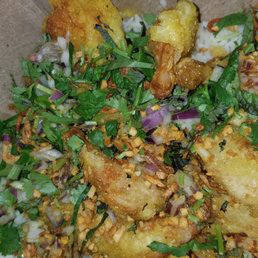

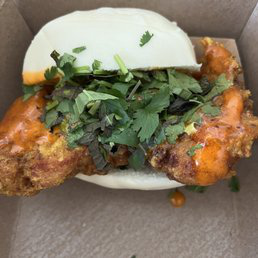

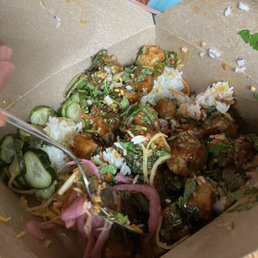

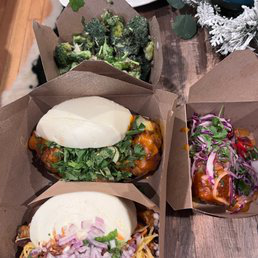

In [81]:
## Get urls of each restaurant's food images page
foourl = list(map(lambda x: "https://www.yelp.com/biz_photos/"+x+"?tab=food", rez.alias))
## pic random restaurant
eat = random.choice(foourl)
## Establish scrapper to pull individual images then pull
url = eat
header = {'user-agent': 'lunch fun'}
r = requests.get(url, headers=header)
foodie = BeautifulSoup(r.text, 'html')
## Don't take first image item as it's very tiny prof pic in top right corner
fl = [x['src'] for x in foodie.find_all("img", "photo-box-img")[1:]]
## Should have 30 images on first page of all (30 should be enough)
# len(fl)
## Display images
for i in fl:
    response = requests.get(i)
    img = Image.open(BytesIO(response.content))
    display(img)

Create Tinder-esque profile for each yelp pull with photos & reviews/description as bio; maybe including pricing attribute